In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications import MobileNet
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Using TensorFlow backend.
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yotam hermon\Anacond

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [4]:
def validation(model, train_datagen):
    #model=Model(inputs=base_model.input,outputs=preds)
    #model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    val_generator=train_datagen.flow_from_directory('../data/validation/', # this is where you specify the path to the main data folder
                                                     target_size=(224,224),
                                                     color_mode='rgb',
                                                     batch_size=16,
                                                     class_mode='categorical',                                                 
                                                     shuffle=True)

    step_size_val=val_generator.n//val_generator.batch_size
    history1 = model.fit_generator(generator=val_generator,
                       steps_per_epoch=step_size_val,
                       epochs=5)
    return history1

In [5]:
base_model_vgg=VGG16(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model_vgg.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

In [6]:
model_vgg=Model(inputs=base_model_vgg.input,outputs=preds)

In [7]:
for layer in model_vgg.layers[:3]:
    layer.trainable=False
for layer in model_vgg.layers[3:]:
    layer.trainable=True

In [8]:
train_datagen_vgg=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_vgg=train_datagen_vgg.flow_from_directory('../Data_for_TIMIT/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=16,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True)

Found 18000 images belonging to 6 classes.


In [9]:
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_vgg=train_generator_vgg.n//train_generator_vgg.batch_size
history_vgg = model_vgg.fit_generator(generator=train_generator_vgg,
                   steps_per_epoch=step_size_train_vgg,
                   epochs=5)


Epoch 1/5
1125/1125 [==============================] - 213s 189ms/step - loss: 3.2420 - accuracy: 0.1637: 5:38 - loss: 56.0980 - accuracy: 0 - ETA: 5:17 - loss: 48.3696 - accuracy: - ETA: 4:56 - loss: 40.6216 - acc - ETA: 4:30 - loss: 31.4462 - accuracy:  - ETA: 4:21 - loss: 28.5294 - a - ETA: 4:05 - loss: 23.2538 - ac - ETA: 3:53 - loss: 19.9152 - accuracy: - ETA: 3:49 - loss: 18.6072 - ac - ETA: 3:41 - loss: 16.4867 - ac - ETA: 3:34 - loss: 14.8410 - accurac - ETA: 3:30 - loss: 13.9646 - accurac - ETA: 3:03 - loss: 9.2745 -  - ETA: 3:00 - loss: 9.0096 - accu - ETA: 2:59 - los - ETA - ETA - ETA:  - ETA: 2:41 - loss: 7.1402 -  - ETA: 2:39 - l - ETA: 2:36 - - ETA: 2:33 - ETA: 2:19 - loss: 5.7999 - accuracy:  - ETA: 2:19 - loss: 5.7705 - accuracy: 0.16 - ETA: 2:18 - loss: 5.7609 - accura - ETA: 2:17 - loss: 5.7132 - ac - ETA: 2:11 - loss: 5.4495 - accu - ETA: 2:01 - ETA: 1:57 - loss: - ETA: 1:55 - - ETA: 1:51 - loss: 4.7906 - ac - ETA: 1:50 - loss: 4 - ETA: 1:48 - - ETA: 1:45 - ETA: 1:4

1125/1125 [==============================] - 210s 186ms/step - loss: 1.7920 - accuracy: 0.16663:29 - loss: 1.7 - ETA: 3:27 - l - ETA: 3:24 - loss: 1.7917 - accuracy: 0.17 - ETA: 3:24 - loss: 1.7917 - accu - ETA: 3:22 - loss: 1.7 - ETA: 3:07 - loss: 1.791 - ETA - ETA: 2:40 - loss: 1 - ETA: 2:21 - loss: 1.791 - ETA: 2:11 - loss: 1.7918 - accuracy:  - ETA: 2:10 - loss: 1.7 - ETA:  - E - ETA: 2:01 - loss: 1.7920 - accuracy:  - ETA: 2:00 - loss: - ETA: 1:58 - loss: 1.7920 - accuracy - E - ETA: 1:49 - loss: 1.7920 - accu - ETA: 1:47 - loss: 1.7 - ETA: 1:41 - loss: 1.7921 - accuracy: 0.16 - ETA: 1:41 - loss: 1.7921 - accuracy: 0. - ETA: 1:41 - loss: 1.792 - ETA: 1:39 - loss: 1.7 - ETA: 1:37 - loss: 1.7920 - ac - ETA: 1:35 - ETA: 1:32 - loss: 1.7920 - accura - ETA: 1:31 - loss: 1.7920 - accuracy - ETA: 1:30 - loss: 1.7920 - ac - ETA: 1:29 - loss: 1.7920 - accu - ETA: 1:28 - loss: 1.7920 - accuracy - ETA: 1:27 - loss: 1.7920 -  - ETA: 1:26 - loss: 1.7920 - accuracy:  - ETA: 1:25 - loss: 1.7920 

In [10]:
x=base_model_vgg.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu',activity_regularizer=regularizers.l2(1e-5))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu',activity_regularizer=regularizers.l2(1e-5))(x) #dense layer 2
x=Dense(512,activation='relu',activity_regularizer=regularizers.l2(1e-5))(x) #dense layer 3
preds=Dense(2,activation='softmax',activity_regularizer=regularizers.l2(1e-5))(x) #final layer with softmax activation

model_vgg_tiktalk=Model(inputs=model_vgg.input,outputs=preds)

for layer in model_vgg.layers[:3]:
    layer.trainable=False
for layer in model_vgg.layers[3:]:
    layer.trainable=True
    
train_datagen_vgg_tiktalk=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_vgg_tiktalk=train_datagen_vgg_tiktalk.flow_from_directory('../data/train/classification/', # this is where you specify the path to the main data folder
                                                                         target_size=(224,224),
                                                                         color_mode='rgb',
                                                                         batch_size=16,
                                                                         class_mode='categorical',                                                 
                                                                         shuffle=True)

Found 2970 images belonging to 2 classes.


In [11]:
model_vgg_tiktalk.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_vgg_tiktalk=train_generator_vgg_tiktalk.n//train_generator_vgg_tiktalk.batch_size
history_vgg_tiktalk = model_vgg_tiktalk.fit_generator(generator=train_generator_vgg_tiktalk,
                                                       steps_per_epoch=step_size_train_vgg_tiktalk,
                                                       epochs=5)

Epoch 1/5
185/185 [==============================] - 37s 198ms/step - loss: 0.6387 - accuracy: 0.8348ETA: 1:09 - loss: 0.6928 - accuracy: 0.468 - ETA: 44s - loss: 0.6917 - a - ETA: 33s - loss: 0.6878 - accuracy: 0.76 - ETA: 32s - loss: 0.687 - ETA: 27s - loss: 0.6808 - accu - ETA: 25s - loss: 0.6765 - accuracy: 0.811 - ETA: 24s - loss: 0.6761 - accuracy: 0.813 - ETA: 24s - loss: 0.6754 - accuracy: - ETA: 23s - loss: 0.6734 - accu - ETA: 20s - loss: 0.6700  - ETA: 18s - loss: 0.6642 - accuracy: 0. - ETA: 18s - loss: 0.6631 - accuracy: 0.8 - ETA: 17s - loss: 0.6626 - accura - ETA: 15s - loss: 0.6596 - accuracy - ETA: 13s - loss: 0.6567 - ETA: 9s - loss: 0.6514 - accu - ETA: 8s - loss: 0.6492  - ETA: 6s - loss: 0.646 - ETA: 4s - loss: 0.643 - ETA: 2s - loss: 0.6413  - ETA: 0s - loss: 0.6392 - accuracy
Epoch 2/5
185/185 [==============================] - 34s 186ms/step - loss: 0.5578 - accuracy: 0.8399 27s - loss: 0.5898 - accuracy: 0.8 - ETA: 27s - loss: 0.5891 - a - ETA: 24s - loss: 0.58

In [12]:
history1_vgg_tiktalk = validation(model_vgg_tiktalk,train_datagen_vgg_tiktalk)

Found 120 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 3s 385ms/step - loss: 0.8542 - accuracy: 0.5096
Epoch 2/5
7/7 [==============================] - 1s 178ms/step - loss: 0.8457 - accuracy: 0.4904
Epoch 3/5
7/7 [==============================] - 1s 186ms/step - loss: 0.8175 - accuracy: 0.5357
Epoch 4/5
7/7 [==============================] - 1s 179ms/step - loss: 0.9075 - accuracy: 0.4615
Epoch 5/5
7/7 [==============================] - 1s 179ms/step - loss: 0.8122 - accuracy: 0.51920s - loss: 0.7913 - accuracy: 0.53


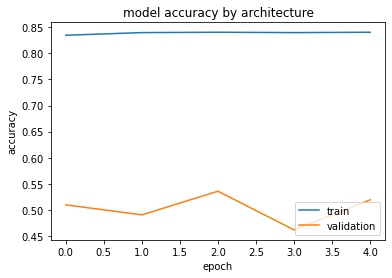

In [13]:
plt.plot(history_vgg_tiktalk.history['accuracy'])
plt.plot(history1_vgg_tiktalk.history['accuracy'])
plt.title('model accuracy VGG16 + TIMIT')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

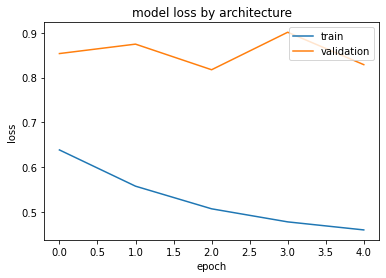

In [14]:
plt.plot(history_vgg_tiktalk.history['loss'])
plt.plot(history1_vgg_tiktalk.history['loss'])
plt.title('model loss VGG16 + TIMIT')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()